### 使用梯度上升法求解主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0.,100.,size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0,10.,size=100)

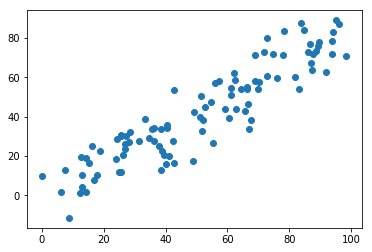

In [3]:
plt.scatter(X[:,0],X[:,1])

### demean

In [4]:
def demean(X):
    return X - np.mean(X, axis=0)

In [5]:
X_demean = demean(X)

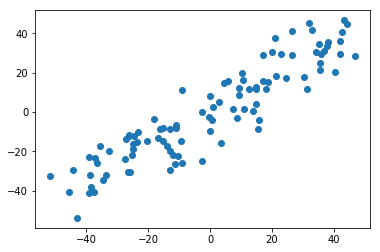

In [6]:
plt.scatter(X_demean[:,0], X_demean[:,1])

上面两个的区别在于坐标轴的变化,demean就是坐标轴的移动

In [7]:
np.mean(X_demean[:,0])

1.9966250874858816e-14

In [8]:
np.mean(X_demean[:,1])

7.958078640513123e-15

### 使用梯度上升法求解上面的这个主成分分析法

X乘以w除以样本数即可,即是我们求的目标函数

In [9]:
def f(w, X):
    return np.sum(X.dot(w)**2) / len(X)

求目标函数对应的梯度

In [10]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. /len(X)

In [11]:
def df_debug(w,X,epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        
        w_2 = w.copy()
        w_2[i] -= epsilon
        
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

梯度上升函数

In [12]:
# 对w向量要调整成单位向量
def direction(w):
    # 向量除以向量的模
    return w / np.linalg.norm(w)

In [13]:
def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w    # 这里的w是单位向量,模为1,经过下面的代码可能使w不为1,需要对齐进行操作
        w = w + eta * gradient
        w = direction(initial_w)   # 注意1:对变化后的w进行单位化,这里的模为1哦!
        
        if(abs(f(w,X) - f(last_w,X)) < epsilon):
            break
        cur_iter += 1
    return w

初始化向量

In [14]:
initial_w = np.random.random(X.shape[1])   # 注意2:;这里不能有零向量,因为零向量的梯度是0,不能求解,查看df_math函数,且w=0是最小值点,但是我们需要最大值
initial_w

array([0.94740402, 0.6399611 ])

In [15]:
eta = 0.001

注意3: 不能使用StandardScaler标准化数据
PCA问题,是求一个轴,让其他点映射到这个轴上面,样本的方差最大,但是将我们的样本数据标准化,样本方差为1了,方差的最大值就不存在了,因为在标准化的过程中,样本间的方差打掉了,就无法求出真正的PCA的最大化的那个结果了

In [16]:
gradient_ascent(df_debug, X_demean, initial_w,eta)

array([0.82866068, 0.55975126])

In [17]:
gradient_ascent(df_math,X_demean,initial_w,eta)

array([0.82866068, 0.55975126])

绘制X_demean的图像,并把w的方向向量绘制

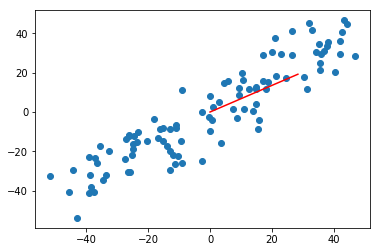

In [18]:
w = initial_w  
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,w[0]*30], [0,w[1]*30],color='r')

上面这个就是第一主成分

下面使用极端的数据进行测试

In [19]:
X1 = np.empty((100,2))
X1[:,0] = np.random.uniform(0.,100.,size=100)
X1[:,1] = 0.75 * X1[:,0] + 3.   # 不添加噪音

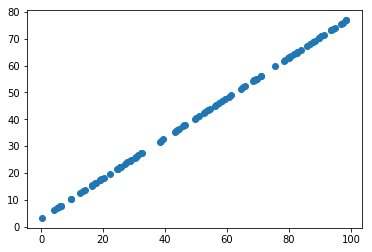

In [20]:
plt.scatter(X1[:,0],X1[:,1])

上面这个情况,如果使用PCA映射的话,也就是这条直线 0.75 * X + 3

这个0.75就是tan(theta) = 0.75

In [21]:
X1_demean = demean(X1)

In [22]:
w1 = gradient_ascent(df_math, X1_demean, initial_w,eta)

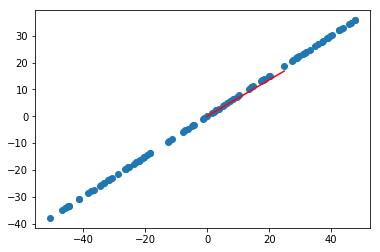

In [23]:
plt.scatter(X1_demean[:,0],X1_demean[:,1])
plt.plot([0,w1[0]*30], [0,w1[1]*30],color='r')